In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nlh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'ticks']


In [ ]:
## NLH
##########################################
##########################################
title = 'b0c8v3'
b0 = 1.50
thresh = 5e-03
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
H_list = ['ph{}_c'.format(title)+i+'.dat' for i in labs_mod]
L_list = ['ph{}_c'.format(title)+i+'.dat' for i in labs_mod]
print("Files:\n", H_list)
H_list = [GIT+i for i in H_list]
L_list = [GIT+i for i in L_list]
algs = ['thresh', 'maxpt', 'norm']

Hs = pd.DataFrame([np.zeros(len(H_list))]*5, index=['cs', 'kapd']+algs).transpose()
Hs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Hs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(3):
    for i in range(len(H_list)): 
      Hs.iloc[i, algind+2] = tjy.H_find(H_list[i], alg=algs[algind], b0=b0, thresh=thresh)
print(Hs)
Ls = pd.DataFrame([np.zeros(len(L_list))]*5, index=['cs', 'kapd']+algs).transpose()
Ls.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Ls.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(3):
    for i in range(len(L_list)): 
      Ls.iloc[i, algind+2] = tjy.H_find(L_list[i], alg=algs[algind], b0=b0, thresh=thresh)
print(Ls)

Files:
 ['phb0c8v3_c002.dat', 'phb0c8v3_c003.dat', 'phb0c8v3_c005.dat', 'phb0c8v3_c007.dat', 'phb0c8v3_c010.dat', 'phb0c8v3_c020.dat', 'phb0c8v3_c050.dat', 'phb0c8v3_c150.dat']
      cs      kapd     thresh      maxpt       norm
0    1.5  7.871251  35.864522  11.834290  20.490083
1    3.0  5.565815  33.608836  11.446394  19.417351
2    5.0  4.311262  31.432491  11.003963  18.288045
3    7.0  3.643681  29.811160  10.638527  17.403282
4   10.0  3.048522  28.008445  10.206748  16.383210
5   20.0  2.155631  24.491125   9.335460  14.365468
6   50.0  1.363341  20.459317   8.386872  12.197038
7  150.0  0.787125  17.295378   7.748389  10.798254


In [ ]:
#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]

## Figure Initialization
f, axs = plt.subplots(3,1, figsize=(5.5,12))
f.suptitle(title, fontsize=16, y=0.98)
plt.subplots_adjust(hspace=0.0, top=0.96)
for i in range(3):
    plt.sca(axs[i])
    plt.plot(EADdeb, EADL_1, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
    plt.plot(EADdeb, EADL_2, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    plt.plot(EADdeb, EADH_1, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
    plt.plot(EADdeb, EADH_2, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")
    plt.xlim(0, 9)
    plt.ylim(0, 55)
    plt.title(r"")
    plt.ylabel('Height' ' [nm]')
    if i==2: 
        plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
        plt.xticks([0, 2, 4, 6, 8])
    else: plt.xticks([])

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
H_kw = {'color': warm_red,  'marker': 'x'}
# thresh
plt.sca(axs[0])
plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
norm = [1, 1]
plt.plot(Ls.kapd, Ls.thresh/norm[0], label= 'Calc L ({})'.format(norm[0]), **L_kw)
plt.plot(Hs.kapd, Hs.thresh/norm[1], label= 'Calc H ({})'.format(norm[1]), **H_kw)

# maxpt
plt.sca(axs[1])
plt.text(*text_loc,'Maxpt', transform=plt.gca().transAxes, **text_kw)
norm = [1, 1]
plt.plot(Ls.kapd, Ls.maxpt/norm[0], label= 'Calc L ({})'.format(norm[0]), **L_kw)
plt.plot(Hs.kapd, Hs.maxpt/norm[1], label= 'Calc H ({})'.format(norm[1]), **H_kw)

# norm
plt.sca(axs[2])
plt.text(*text_loc,'Norm', transform=plt.gca().transAxes, **text_kw)
norm = [1, 1]
plt.plot(Ls.kapd, Ls.norm/norm[0], label= 'Calc L ({})'.format(norm[0]), **L_kw)
plt.plot(Hs.kapd, Hs.norm/norm[1], label= 'Calc H ({})'.format(norm[1]), **H_kw)

for i in range(3): leg = axs[i].legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
tjy.ticks(axs)
plt.show()

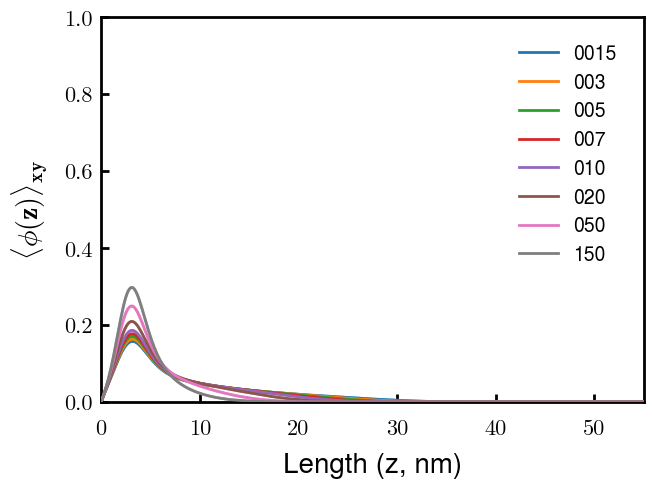

(<Figure size 700x500 with 1 Axes>,
 <AxesSubplot: xlabel='Length (z, nm)', ylabel='$\\bf{\\langle\\phi(z)\\rangle}_{xy}$'>)

In [7]:
labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
read_list = [GIT+"phb5c8v3_c"+i+".dat" for i in labs_mod]
block_Ni = [[7]]*len(read_list)

tjy.plot_pha(read_list, b0=1.25, x1_end=55, block_Ni=block_Ni, labs=labs, double=False)

In [64]:
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb204_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

b0 = 2.0 ########################################################

print("[", end="")
for i in range(len(read_list)): 
  print(Gibbsf(read_list[i], b0), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb204_c004.dat', 'phb204_c005.dat', 'phb204_c006.dat', 'phb204_c008.dat', 'phb204_c010.dat', 'phb204_c015.dat', 'phb204_c020.dat', 'phb204_c030.dat', 'phb204_c040.dat', 'phb204_c050.dat']
[47.072316105215066, 43.80163822417714, 40.553781442826605, 33.74345145045215, 26.435680243045564, 20.04621971732655, 18.616687699146954, 17.685826677916314, 17.493512107544532, 17.10685582144304]


In [8]:
read_list = ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125',
              '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
x = [float(i)/100 for i in read_list]
read_list = ['p1a0_x'+i+'.dat' for i in read_list]
H = [Gibbsf(i, 1.0) for i in read_list]

FileNotFoundError: [Errno 2] No such file or directory: 'p1a0_x040.dat'

In [9]:
plt.plot(x, H, 'o')

NameError: name 'H' is not defined

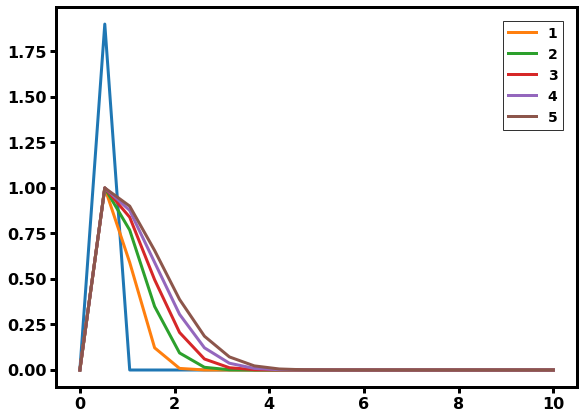

In [ ]:
plt.figure()
x = np.linspace(0,10,20)
dx = x[1]-x[0]
y = [0] + [1/dx]+[0]*(len(x)-2)
plt.plot(x, y)

for i in [1, 2, 3, 4, 5]:
  yg = np.exp(-(x-x[1])**2/(i*dx))
  yg[0] = 0    
  plt.plot(x, yg, label=i)
plt.legend()
plt.show()